In [2]:
import numpy as np

#Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers import *
from qiskit.circuit import Parameter

import matplotlib.pyplot as plt

In [3]:
from qiskit.circuit import Parameter

e1 = Parameter('$\epsilon_1$')
e2 = Parameter('$\epsilon_2$')
e3 = Parameter('$\epsilon_3$')
#__________________________________

e4 = Parameter('$\epsilon_4$')
e5 = Parameter('$\epsilon_5$')

In [4]:
def stepwise_circ2(a,b,e,qc):
    
    arr=np.sort([a,b])
    
    qc.barrier()
    qc.cx(arr[0],arr[1])
    
    qc.barrier()
    qc.rz(e,arr[1])
    qc.barrier()
    
    qc.cx(arr[0],arr[1])
    qc.barrier()
    return(qc)

def stepwise_circ3(a,b,c,e,qc):
    
    arr=np.sort([a,b,c])
    
    qc.barrier()
    qc.cx(arr[0],arr[1])
    qc.cx(arr[1],arr[2])
    
    qc.barrier()
    qc.rz(e,arr[2])
    qc.barrier()

    qc.cx(arr[1],arr[2])
    qc.cx(arr[0],arr[1])
    qc.barrier()
    return(qc)

def stepwise_circ4(a,b,c,d,e,qc):
    
    arr=np.sort([a,b,c,d])
    
    qc.barrier()
    qc.cx(arr[0],arr[1])
    qc.cx(arr[1],arr[2])
    qc.cx(arr[2],arr[3])
    
    qc.barrier()
    qc.rz(e,arr[3])
    qc.barrier()

    qc.cx(arr[2],arr[3])
    qc.cx(arr[1],arr[2])
    qc.cx(arr[0],arr[1])
    qc.barrier()
    return(qc)
    

## $U_{1937}$

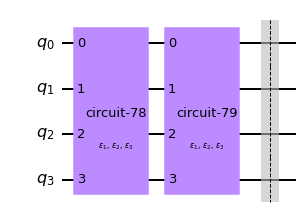

In [5]:
qc1=QuantumCircuit(4)

qc1.h([1,3])
stepwise_circ2(1,3,e1,qc1)
stepwise_circ4(0,1,2,3,e2,qc1)
stepwise_circ3(1,2,3,-1*e3,qc1)
stepwise_circ3(0,1,3,-1*e3,qc1)
qc1.h([1,3])


#______________________________________________

qc2=QuantumCircuit(4)

qc2.rx(np.pi/2,[1,3])
stepwise_circ2(1,3,e2,qc2)
stepwise_circ3(1,2,3,-1*e3,qc2)
stepwise_circ3(0,1,3,-1*e3,qc2)
stepwise_circ4(0,1,2,3,e1,qc2)
qc2.rx(-1*np.pi/2,[1,3])

#__________________________________

circ1 = QuantumCircuit(4, name='Circ-1937')

circ1.append(qc1,[0,1,2,3])
circ1.append(qc2,[0,1,2,3])

#circ1 = circ1.bind_parameters({e1: np.pi/16})
circ1.barrier()
circ1.draw('mpl')

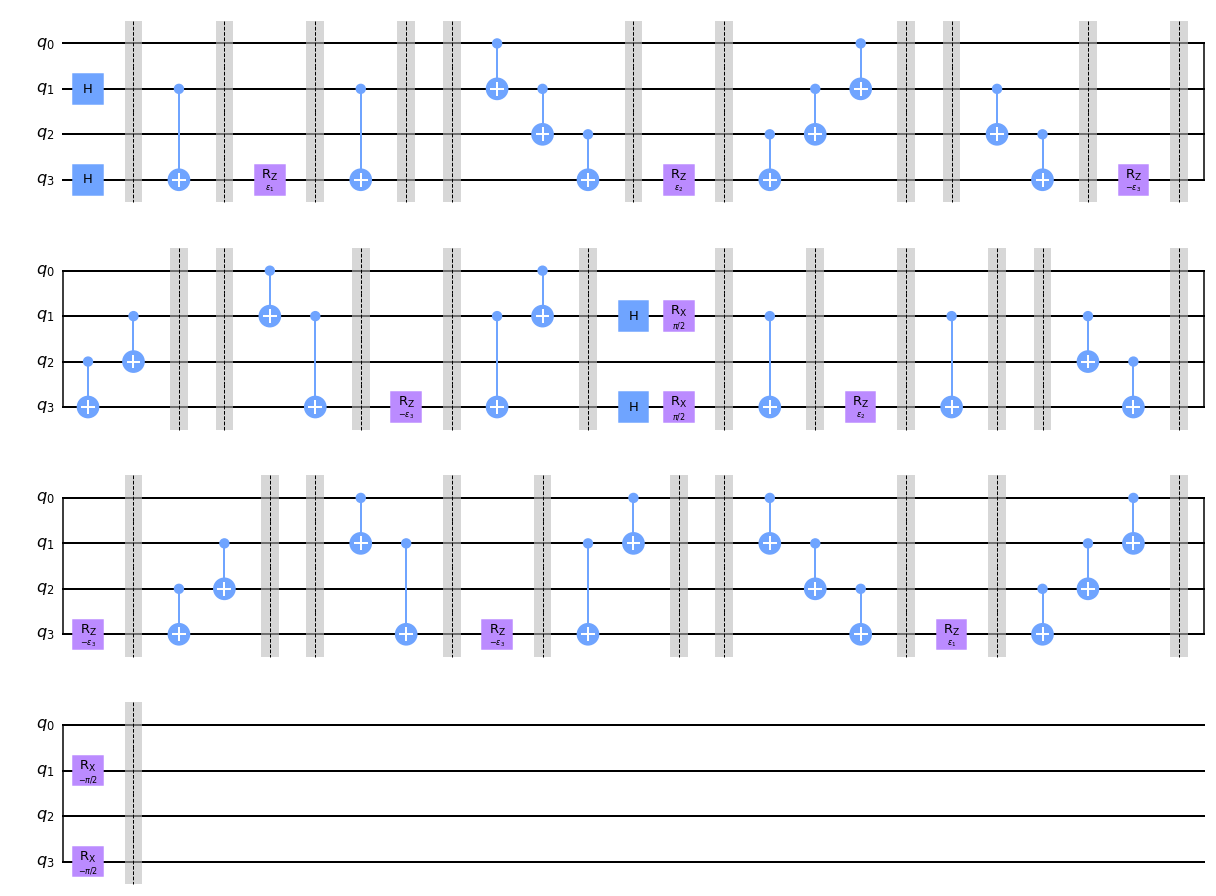

In [18]:
circ=circ1.decompose()
circ.draw('mpl')

## $U_{28}$

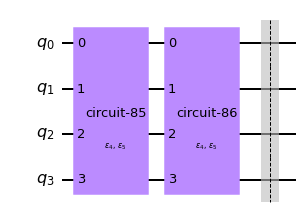

In [6]:
qc1=QuantumCircuit(4)

qc1.h([1,2])
stepwise_circ2(1,2,e4,qc1)
stepwise_circ3(1,2,3,-1*e4,qc1)
stepwise_circ3(0,1,2,e5,qc1)
stepwise_circ4(0,1,2,3,-1*e5,qc1)
qc1.h([1,2])


qc2=QuantumCircuit(4)

qc2.rx(np.pi/2,[1,2])
stepwise_circ3(0,1,2,e4,qc2)
stepwise_circ4(0,1,2,3,-1*e4,qc2)
stepwise_circ2(1,2,e5,qc2)
stepwise_circ3(1,2,3,-1*e5,qc2)
qc2.rx(-1*np.pi/2,[1,2])

#__________________________________

circ2 = QuantumCircuit(4, name='Circ-28')

circ2.append(qc1,[0,1,2,3])
circ2.append(qc2,[0,1,2,3])

#circ1 = circ1.bind_parameters({e1: np.pi/16})
circ2.barrier()
circ2.draw('mpl')

## $U_{46}$

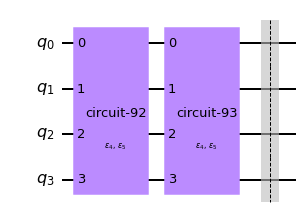

In [7]:
qc1=QuantumCircuit(4)

qc1.h([0,3])
stepwise_circ2(0,3,e4,qc1)
stepwise_circ3(0,1,3,-1*e4,qc1)
stepwise_circ3(0,2,3,e5,qc1)
stepwise_circ4(0,1,2,3,-1*e5,qc1)
qc1.h([0,3])


qc2=QuantumCircuit(4)

qc2.rx(np.pi/2,[0,3])
stepwise_circ2(0,3,e5,qc2)
stepwise_circ3(0,2,3,e4,qc2)
stepwise_circ3(0,1,3,-1*e5,qc2)
stepwise_circ4(0,1,2,3,-1*e4,qc2)
qc2.rx(-1*np.pi/2,[0,3])

#_________________________________

circ3 = QuantumCircuit(4, name='Circ-46')

circ3.append(qc1,[0,1,2,3])
circ3.append(qc2,[0,1,2,3])

circ3.barrier()
circ3.draw('mpl')

## $U_{5}$

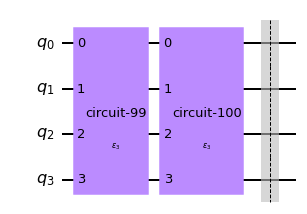

In [8]:
qc1=QuantumCircuit(4)

qc1.h([0,2])
stepwise_circ2(0,2,e3,qc1)
stepwise_circ3(0,2,3,-1*e3,qc1)
stepwise_circ3(0,1,2,-1*e3,qc1)
stepwise_circ4(0,1,2,3,e3,qc1)
qc1.h([0,2])

qc2=QuantumCircuit(4)

qc2.rx(np.pi/2,[0,2])
stepwise_circ2(0,2,e3,qc2)
stepwise_circ3(0,2,3,-1*e3,qc2)
stepwise_circ3(0,1,2,-1*e3,qc2)
stepwise_circ4(0,1,2,3,e3,qc2)
qc2.rx(-1*np.pi/2,[0,2])


#_________________________________

circ4 = QuantumCircuit(4, name='Circ-5')

circ4.append(qc1,[0,1,2,3])
circ4.append(qc2,[0,1,2,3])


#circ1 = circ1.bind_parameters({e1: np.pi/16})
circ4.barrier()
circ4.draw('mpl')

In [9]:
# Parameters

p1=np.pi*(2+np.sqrt(3))/8
p2=np.pi*(2-np.sqrt(3))/8
p3=np.pi/8
p4=np.pi*(np.sqrt(2)+np.sqrt(6))/16
p5=np.pi*(np.sqrt(2)-np.sqrt(6))/16


In [10]:
def trotterize(qc,circ1,circ2,circ3,circ4,n):
    for i in range(n):
        qc.append(circ1,range(4))
        qc.append(circ2,range(4))
        qc.append(circ3,range(4))
        qc.append(circ4,range(4))
        qc = qc.bind_parameters({e1: p1/n, e2: p2/n, e3: p3/n, e4: p4/n, e5: p5/n})
        qc.barrier()
    return qc

## 11 State

## 00 state

## 10 state